### 📢 ATTENTION

This section is a continuation of the **EDA & Pre-Processing** section, focusing on implementing models using different classification methods enhanced with **Permutation Feature Selection (PFI)**.  PFI is used to **reduce variables that do not contribute significantly to the model**, optimizing its performance.  Multiple tests were conducted to understand the process of optimizing classification methods using PFI.

> The **Exploration Data Analysis (EDA) process** and **the data pre-processing** of this process can be read **[here!](https://github.com/janasatvika/Optimizing-Classification-Models-using-Permutation-Feature-Importance-Method/blob/main/EDA%20%26%20pre-Processing/EDA_%26_pre_Processing.ipynb)**



#📥 **Import modules**

In [ ]:
# Data manipulation modules
import pandas as pd
import numpy as np

# Graph modules
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter tunning module
from sklearn.model_selection import GridSearchCV

# Handle Imbalance dataset modules
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import KMeans

# Modelling & Evaluation modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from itertools import combinations

#📥 **Load graduation dataset (.csv)**

In [ ]:
# Load graduation dataset from google drive directory
graduation_dataset = "/content/drive/MyDrive/Repository/Optimizing Classification Models using Permutation Feature Importance Method/Dataset/Graduation_final.csv"
df = pd.read_csv(graduation_dataset)
# Show dataframe of graduation dataset
df.head()

,is_Female,is_Male,Student ID,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,1.0,0.0,mhs0001,0.677,0.0,0.630,0.000,0.00,0.000,0.0,0
1,0.0,1.0,mhs0002,0.677,0.0,0.825,0.802,0.86,0.862,0.0,0
2,0.0,1.0,mhs0003,0.677,0.0,0.575,0.610,0.75,0.720,0.0,0
3,0.0,1.0,mhs0004,0.677,0.0,0.825,0.865,0.86,0.875,0.0,0
4,0.0,1.0,mhs0005,0.839,0.0,0.022,0.000,0.00,0.000,0.0,0


# ***3. Splitting graduation dataset***

At this stage, the data set is divided into two parts, namely training data and testing data. Training data is used for the learning process with classification models, while testing data is used to test the performance of the model in predicting on-time graduation of students.

The dataset is divided with a ratio of **80% for training data** and **20% for testing data**.

In [ ]:
# Features (X): Drop "Student ID" and "Graduation status" columns
X = df.drop(["Student ID", "Graduation status"], axis=1)
# Target variable (y): "Graduation status" column
y = df["Graduation status"]
# Student IDs (id): "Student ID" column
id = df["Student ID"]

# Printing the shape of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
# Displaying the first few rows of X, y, and id for verification
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())
print("\nFirst few rows of id:")
print(id.head())

Shape of X: (459, 9)
Shape of y: (459,)

First few rows of X:
   is_Female  is_Male    UKT  Parents' income  IPS 1  IPS 2  IPS 3  IPS 4  \
0        1.0      0.0  0.677              0.0  0.630  0.000   0.00  0.000   
1        0.0      1.0  0.677              0.0  0.825  0.802   0.86  0.862   
2        0.0      1.0  0.677              0.0  0.575  0.610   0.75  0.720   
3        0.0      1.0  0.677              0.0  0.825  0.865   0.86  0.875   
4        0.0      1.0  0.839              0.0  0.022  0.000   0.00  0.000   

   Retake total  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

First few rows of y:
0    0
1    0
2    0
3    0
4    0
Name: Graduation status, dtype: int64

First few rows of id:
0    mhs0001
1    mhs0002
2    mhs0003
3    mhs0004
4    mhs0005
Name: Student ID, dtype: object


In [ ]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, id, test_size=0.20, random_state=42)

# Printing the shapes of the resulting sets for verification
print("Shapes after splitting:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("id_train shape:", id_train.shape)
print("id_test shape:", id_test.shape)

Shapes after splitting:
X_train shape: (367, 9)
X_test shape: (92, 9)
y_train shape: (367,)
y_test shape: (92,)
id_train shape: (367,)
id_test shape: (92,)


# ***4. Handle Imbalanced Dataset (K-MeansSMOTE)***

The graduation data of the students of Undiksha's PTI program **is unbalanced**, with the number of on-time graduates far less than the number of late graduates. **K-means SMOTE is used** to balance the classes in the training data after splitting the data set. It consists of three steps: **clustering, filtering, and oversampling**. Clustering categorizes the input space into k groups using k-means. Filtering selects the clusters for oversampling. Finally, oversampling with SMOTE is selected on each cluster to achieve the desired ratio between minority and majority instances.

In [ ]:
# Create copies of the original training data for resampling process
X_train_smt, y_train_smt = X_train.copy(), y_train.copy()

smt = KMeansSMOTE(
    # Target minority class to be 75% of the majority class size after resampling.
    sampling_strategy=0.75,
    # Seed for reproducibility.
    random_state=42,
    # Nearest neighbors to use for generating synthetic samples.
    k_neighbors=9,
    # Number of jobs for parallel processing. 'None' for single-threaded.
    n_jobs=None,
    kmeans_estimator=KMeans(
        # Number of clusters for KMeans before SMOTE.
        n_clusters=10,
        # Seed for KMeans reproducibility.
        random_state=42
        ),
    # Minimum cluster size as a fraction for considering in sampling.
    cluster_balance_threshold=0.2,
    # 'Auto' lets the algorithm adjust sampling based on cluster density.
    density_exponent='auto')

# Applying KMeansSMOTE to resample the training data
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_smt, y_train_smt)

# Round the values in the resampled training data
X_train_resampled = np.round(X_train_resampled, decimals=3)

# Displaying the class balance of the original training data
print("Data Training Original")
print(y_train.value_counts())
# Displaying the class balance of the training data after SMOTE
print("Data Training + SMOTE")
print(y_train_resampled.value_counts())
# Displaying the number of data points in the test set
print("Data Testing")
print(y_test.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Data Training Original
0    327
1     40
Name: Graduation status, dtype: int64
Data Training + SMOTE
0    327
1    245
Name: Graduation status, dtype: int64
Data Testing
0    83
1     9
Name: Graduation status, dtype: int64


# ***5. Hyperparameter Tuning***

Some algorithms require hyperparameter tuning prior to classification. In the case of the KNN algorithm, hyperparameter tuning is required to obtain the best combination of parameters. This tuning process involves testing several parameters, such as the number of **K-neighbors, weighting, and distance measurement metrics**.

Each parameter combination is tested 10 times using **K-fold cross validation**, where the average is calculated. The goal of this process is to **find the optimal parameter configuration to improve the performance of the KNN model** in performing classification.


In [ ]:
def tune_model(X_train, y_train, parameters, cv=10):
    """
    Tune model classifier with given parameters and cross-validation.

    Args:
    - X_train: Features of the training data.
    - y_train: Target variable of the training data.
    - parameters: Dictionary of parameters to tune.
    - cv: Number of cross-validation folds.

    Returns:
    - A fitted GridSearchCV object.
    """

    # Initialize the classifier (K-Nearest Neighbors in this case)
    clf = KNeighborsClassifier()
    # Create a GridSearchCV object with the classifier, parameters, and cross-validation
    model = GridSearchCV(clf, parameters, cv=cv, verbose=1)
    # Fit the model on the training data to find the best parameters
    model.fit(X_train, y_train)
    # Return the fitted model for further use
    return model

# Parameters for tuning
parameters = {
    'n_neighbors': range(1, 50, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'minkowski', 'manhattan']
}

# Perform tuning
model_ori = tune_model(X_train, y_train, parameters)
model_balancing = tune_model(X_train_resampled, y_train_resampled, parameters)

# Prepare and display tuning results
tuning_results = pd.DataFrame({
    "Parameters" : ["Metric", "N_neighbors","Weights"],
    "Original training data": [model_ori.best_params_["metric"],
                               model_ori.best_params_["n_neighbors"],
                               model_ori.best_params_["weights"]],
    "Balancing training data": [model_balancing.best_params_["metric"],
                                model_balancing.best_params_["n_neighbors"],
                                model_balancing.best_params_["weights"]]
    })

tuning_results

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


,Parameters,Original training data,Balancing training data
0,Metric,manhattan,manhattan
1,N_neighbors,11,7
2,Weights,distance,distance


# ***6. Modelling & Evaluation***

At this stage, the modeling and evaluation processes are performed **in two different schemes**:


1. The model is trained **using the original training data**, where there is a significant imbalance between the "On-Time" and "Late" classes.
2. The model is trained **using training data that has undergone a balancing process**. The distribution of "On-Time" and "Late" classes in the training data may not be 50:50, as the improvement in model performance does not always occur with perfect balancing.





In [ ]:
# Define the calculate_confusion_matrix function
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the elements of a confusion matrix.

    Parameters:
        - y_true: Array of true labels
        - y_pred: Array of predicted labels

    Returns:
        - tp: True Positives
        - tn: True Negatives
        - fp: False Positives
        - fn: False Negatives
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

In [ ]:
# Create a K-Nearest Neighbors (KNN) classifier object with the best hyperparameters
knn_ori = KNeighborsClassifier(
    n_neighbors=model_ori.best_params_['n_neighbors'],
    weights=model_ori.best_params_['weights'],
    metric=model_ori.best_params_['metric']
    )

knn_balancing = KNeighborsClassifier(
    n_neighbors=model_balancing.best_params_['n_neighbors'],
    weights=model_balancing.best_params_['weights'],
    metric=model_balancing.best_params_['metric']
    )

## 6.1 Using original dataset

In [ ]:
# Create copies of the original training and test sets
X_train_ori, y_train_ori = X_train.copy(), y_train.copy()
X_test_ori, y_test_ori = X_test.copy(), y_test.copy()

# Train the knn classifier on the original training set
knn_ori.fit(X_train_ori, y_train_ori)

# Evaluate the model on the test set and make predictions
y_pred_ori = knn_ori.predict(X_test_ori)

# Calculate the confusion matrix elements
tp, tn, fp, fn = calculate_confusion_matrix(y_test_ori, y_pred_ori)

# Print the elements of the confusion matrix
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

# Create a table for the confusion matrix
confusion_table = pd.DataFrame(
    {'Predicted 0': [tn, fn], 'Predicted 1': [fp, tp]},
    index=['Actual 0', 'Actual 1']
)
print("\nConfusion Matrix:")
print(confusion_table)

# Calculate the accuracy
accuracy_ori = ((tp + tn) / (tp + tn + fp + fn))
print('Accuracy Score: {:.2f}%'.format(accuracy_ori * 100))

# Calculate the recall
all_actual_positive = tp + fn
recall_ori = (tp / all_actual_positive)
print('Recall Score: {:.2f}%'.format(recall_ori * 100))

# Calculate the precision
all_predicted_positives = tp + fp
precision_ori = (tp / all_predicted_positives)
print('Precision Score: {:.2f}%'.format(precision_ori * 100))

# Calculate the f1-score
f1_score_ori = ((2 * precision_ori * recall_ori) / (precision_ori + recall_ori))
print('f1-Score: {:.2f}%'.format(f1_score_ori * 100))

True Positive (TP): 1
True Negative (TN): 81
False Positive (FP): 2
False Negative (FN): 8

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           81            2
Actual 1            8            1
Accuracy Score: 89.13%
Recall Score: 11.11%
Precision Score: 33.33%
f1-Score: 16.67%


## 6.2 Using more balanced dataset

In [ ]:
# Create copies of the more balanced training sets
X_train_main, y_train_main = X_train_resampled.copy(), y_train_resampled.copy()
X_test_main, y_test_main = X_test.copy(), y_test.copy()

# Train the knn classifier on the more balanced training set
knn_balancing.fit(X_train_main, y_train_main)

# Evaluate the model on the test set and make predictions
y_pred_main = knn_balancing.predict(X_test_main)

# Calculate the confusion matrix elements
tp, tn, fp, fn = calculate_confusion_matrix(y_test_main, y_pred_main)

# Print the elements of the confusion matrix
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

# Create a table for the confusion matrix
confusion_table = pd.DataFrame(
    {'Predicted 0': [tn, fn], 'Predicted 1': [fp, tp]},
    index=['Actual 0', 'Actual 1']
)
print("\nConfusion Matrix:")
print(confusion_table)

# Calculate the accuracy
accuracy_main = ((tp + tn) / (tp + tn + fp + fn))
print('Accuracy Score: {:.2f}%'.format(accuracy_main * 100))

# Calculate the recall
all_actual_positive = tp + fn
recall_main = (tp / all_actual_positive)
print('Recall Score: {:.2f}%'.format(recall_main * 100))

# Calculate the precision
all_predicted_positives = tp + fp
precision_main = (tp / all_predicted_positives)
print('Precision Score: {:.2f}%'.format(precision_main * 100))

# Calculate the f1-score
f1_score_main = ((2 * precision_main * recall_main) / (precision_main + recall_main))
print('f1-Score: {:.2f}%'.format(f1_score_main * 100))

True Positive (TP): 4
True Negative (TN): 76
False Positive (FP): 7
False Negative (FN): 5

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           76            7
Actual 1            5            4
Accuracy Score: 86.96%
Recall Score: 44.44%
Precision Score: 36.36%
f1-Score: 40.00%


# ***7. 🔥 Optimization by PFI***

The Permutation Feature Importance (PFI) method determines the importance of each feature in a model's performance.  Randomizing a feature’s values allows us to observe its impact on the model.  If the model's performance remains unchanged, the feature is not significant.  Conversely, a significant decrease in performance suggests a strong influence by the feature.  PFI helps to identify and focus on the most important features for analysis and prediction, leading to better understanding and informed decision-making.



> Optimization using PFI is performed on models trained with more balanced training data. The accuracy of the previous evaluation results is used as the baseline score in the PFI process. Below is a formula for calculating the importance of each feature:

$$
Importance score = Baseline score - permuted score
$$



## 7.1 PFI test (10 iteration)

The PFI process was repeated for 10 iterations, using different N-shuffle values ranging from 10 to 100 (in multiples of 10). Each iteration involved varying levels of randomization, allowing for a ranking of feature contributions to model predictions.  This step helps assess the consistency of PFI in determining a feature's contribution to model prediction.

In [ ]:
# Define the baseline accuracy
baseline_accuracy = accuracy_main

# Define the number of shuffles
n_shuffle_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create empty dictionary to store mean importances for each feature
mean_importances_per_feature = {feature: [] for feature in X_test_main.columns}

# Create a loop to iterate over different numbers of shuffles
for n_shuffles_ in n_shuffle_values:
    # Create empty lists to store the importances and mean accuracies
    importances = []
    mean_accuracies = []

    # Iterate over each feature
    for feature in X_test_main.columns:
        importance_scores = []
        accuracy_scores = []

        # Perform shuffling and evaluation n_shuffles_ times
        for _ in range(n_shuffles_):
            # Create a copy of the original test set
            X_test_shuffled = X_test_main.copy()
            # Shuffle the current feature
            X_test_shuffled[feature] = np.random.permutation(X_test_shuffled[feature])
            # Make predictions on the shuffled test set
            y_pred_permuted = knn_balancing.predict(X_test_shuffled)
            # Calculate the confusion matrix for the shuffled predictions
            tp, tn, fp, fn = calculate_confusion_matrix(y_test_main, y_pred_permuted)
            # Calculate the permuted accuracy
            permuted_accuracy = ((tp + tn) / (tp + tn + fp + fn))
            # Calculate the importance as the difference from the baseline accuracy
            importance = baseline_accuracy - permuted_accuracy
            # Append the importance and accuracy scores to the lists
            importance_scores.append(importance) # There are N_shuffle importance scores
            accuracy_scores.append(permuted_accuracy) # There are N_shuffle accuracy scores

        # Calculate the mean importance and accuracy for the current feature
        mean_importance = np.mean(importance_scores)
        mean_accuracy = np.mean(accuracy_scores)
        # Append the mean importance and accuracy to the respective lists
        importances.append(mean_importance) # Add mean importance score for each features
        mean_accuracies.append(mean_accuracy) # Add mean accuracy score for each features

        # Append mean importance to the dictionary for the current feature
        mean_importances_per_feature[feature].append(mean_importance)

    # Convert the importances to numpy arrays
    importances = np.array(importances)
    mean_accuracies = np.array(mean_accuracies)

    # Sort the features based on their importances
    indices = np.argsort(importances)

    # Create a DataFrame for the importance table
    importance_tables = pd.DataFrame(
        {'Feature': X_test_main.columns[indices], 'Importance': importances[indices], 'Mean Accuracy': mean_accuracies[indices]}
    )

    # Print the importance table for the current value of n_shuffles_
    print(f"Number of shuffles (n_shuffle_pfi = {n_shuffles_}):")
    display(importance_tables)
    print("\n")


# Calculate the mean of importances for each feature across different shuffles
mean_importances_across_shuffles = {
    feature: np.mean(importances) for feature, importances in mean_importances_per_feature.items()
}

# Create a DataFrame to display mean importances across shuffles
mean_importances_df = pd.DataFrame(
    {'Feature': list(mean_importances_across_shuffles.keys()), 'Mean Importance': list(mean_importances_across_shuffles.values())}
)

# Sort mean_importances_df by "Mean Importance" in ascending order
mean_importances_df = mean_importances_df.sort_values(by='Mean Importance', ascending=True)

Number of shuffles (n_shuffle_pfi = 10):


,Feature,Importance,Mean Accuracy
0,IPS 2,-0.019565,0.889130
1,IPS 4,-0.015217,0.884783
2,IPS 1,-0.011957,0.881522
3,IPS 3,-0.003261,0.872826
4,Parents' income,0.000000,0.869565
5,UKT,0.003261,0.866304
6,Retake total,0.005435,0.864130
7,is_Female,0.020652,0.848913
8,is_Male,0.039130,0.830435




Number of shuffles (n_shuffle_pfi = 20):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.023913,0.893478
1,IPS 2,-0.013043,0.882609
2,IPS 1,-0.013043,0.882609
3,IPS 3,-0.004891,0.874457
4,Parents' income,0.000000,0.869565
5,UKT,0.001630,0.867935
6,Retake total,0.004348,0.865217
7,is_Male,0.029348,0.840217
8,is_Female,0.031522,0.838043




Number of shuffles (n_shuffle_pfi = 30):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.019928,0.889493
1,IPS 1,-0.010870,0.880435
2,IPS 2,-0.009058,0.878623
3,UKT,-0.007246,0.876812
4,IPS 3,-0.006159,0.875725
5,Parents' income,0.000000,0.869565
6,Retake total,0.003986,0.865580
7,is_Male,0.027174,0.842391
8,is_Female,0.030435,0.839130




Number of shuffles (n_shuffle_pfi = 40):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.017935,0.887500
1,IPS 3,-0.009511,0.879076
2,IPS 1,-0.008696,0.878261
3,IPS 2,-0.006793,0.876359
4,UKT,-0.001902,0.871467
5,Parents' income,0.000000,0.869565
6,Retake total,0.008424,0.861141
7,is_Female,0.029348,0.840217
8,is_Male,0.030163,0.839402




Number of shuffles (n_shuffle_pfi = 50):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.019130,0.888696
1,IPS 2,-0.010870,0.880435
2,IPS 1,-0.006087,0.875652
3,IPS 3,-0.005000,0.874565
4,Parents' income,0.000000,0.869565
5,UKT,0.003913,0.865652
6,Retake total,0.004130,0.865435
7,is_Female,0.026304,0.843261
8,is_Male,0.037609,0.831957




Number of shuffles (n_shuffle_pfi = 60):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.015399,0.884964
1,IPS 3,-0.007428,0.876993
2,IPS 2,-0.006703,0.876268
3,IPS 1,-0.005616,0.875181
4,Parents' income,0.000000,0.869565
5,UKT,0.000362,0.869203
6,Retake total,0.004348,0.865217
7,is_Male,0.026993,0.842572
8,is_Female,0.033152,0.836413




Number of shuffles (n_shuffle_pfi = 70):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.021273,0.890839
1,IPS 2,-0.014130,0.883696
2,IPS 1,-0.007298,0.876863
3,IPS 3,-0.006522,0.876087
4,Parents' income,0.000000,0.869565
5,Retake total,0.004969,0.864596
6,UKT,0.005435,0.864130
7,is_Male,0.027329,0.842236
8,is_Female,0.030590,0.838975




Number of shuffles (n_shuffle_pfi = 80):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.018071,0.887636
1,IPS 2,-0.012500,0.882065
2,IPS 1,-0.009103,0.878668
3,IPS 3,-0.003804,0.873370
4,Parents' income,0.000000,0.869565
5,UKT,0.001495,0.868071
6,Retake total,0.005842,0.863723
7,is_Male,0.026495,0.843071
8,is_Female,0.027989,0.841576




Number of shuffles (n_shuffle_pfi = 90):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.019324,0.888889
1,IPS 1,-0.008333,0.877899
2,IPS 2,-0.007850,0.877415
3,IPS 3,-0.006884,0.876449
4,Parents' income,0.000000,0.869565
5,UKT,0.001329,0.868237
6,Retake total,0.003623,0.865942
7,is_Male,0.029710,0.839855
8,is_Female,0.035145,0.834420




Number of shuffles (n_shuffle_pfi = 100):


,Feature,Importance,Mean Accuracy
0,IPS 4,-0.018152,0.887717
1,IPS 2,-0.011522,0.881087
2,IPS 1,-0.010652,0.880217
3,IPS 3,-0.004457,0.874022
4,Parents' income,0.000000,0.869565
5,UKT,0.003261,0.866304
6,Retake total,0.005435,0.864130
7,is_Female,0.029783,0.839783
8,is_Male,0.030761,0.838804


## 7.2 Mean of 10 iteration test

In [ ]:
# Display the DataFrame with mean importances across shuffles
print("Mean Importances Across Different Numbers of Shuffles:")
display(mean_importances_df)

Mean Importances Across Different Numbers of Shuffles:


,Feature,Mean Importance
7,IPS 4,-0.018834
5,IPS 2,-0.011204
4,IPS 1,-0.009166
6,IPS 3,-0.005792
3,Parents' income,0.000000
2,UKT,0.001154
8,Retake total,0.005054
0,is_Female,0.029492
1,is_Male,0.030471


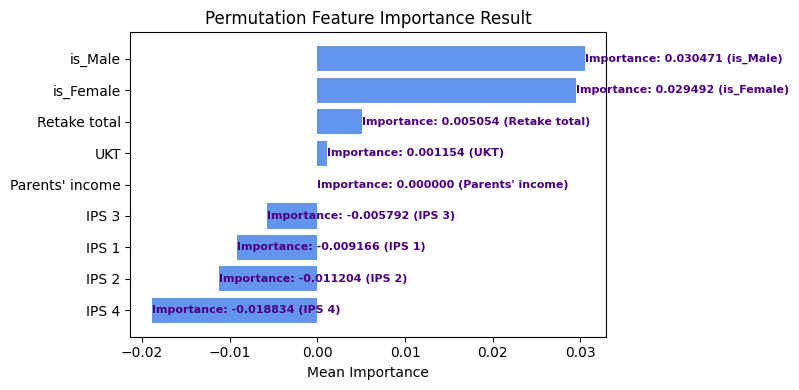

In [ ]:
# Plot the permutation feature importance with feature names and their mean importance scores
plt.figure(figsize=(8, 4))

# Create horizontal bar plot
plt.barh(range(len(mean_importances_df)), mean_importances_df['Mean Importance'], align='center', color='cornflowerblue')
plt.yticks(range(len(mean_importances_df)), mean_importances_df['Feature'])

# Add importance scores next to the bars
for i, importance in enumerate(mean_importances_df['Mean Importance']):
    feature_name = mean_importances_df['Feature'].iloc[i]
    # Display the importance score along with the feature name
    plt.text(importance, i, f"Importance: {importance:.6f} ({feature_name})",
             color='indigo', fontweight='bold', fontsize=8, verticalalignment='center')

plt.xlabel('Mean Importance')
plt.title("Permutation Feature Importance Result")
plt.tight_layout()
plt.show()

## 7.3 Select three irrelevant features

In [ ]:
# Get the 3 features with the lowest mean importance scores
lowest_mean_importances_features = mean_importances_df.head(3)['Feature'].tolist()

# Print and display the 3 features with the lowest mean importance
print("3 Features with the Lowest Mean Importance:")
lowest_feature = pd.DataFrame({"Lowest importance": lowest_mean_importances_features})
lowest_feature

3 Features with the Lowest Mean Importance:


,Lowest importance
0,IPS 4
1,IPS 2
2,IPS 1


# ***8. 🏆 Final Modelling & Evaluatioan***

The test was performed by **brute force**, selecting the **three features with the lowest contribution**. Then, all possible combinations or subsets of features are removed to cover all possibilities. Next, the performance of the model is **re-evaluated for each combination of deletions**.

In [ ]:
# Create copies of the more balanced training sets
X_train_op, y_train_op = X_train_main.copy(), y_train_main.copy()
X_test_op, y_test_op = X_test.copy(), y_test.copy()

# Initialize an empty list to collect dictionaries
results_data = []

# Prepare DataFrame to store results
results_df = pd.DataFrame(columns=['Removed Features', 'Confusion Matrix', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])

# Loop through combinations and evaluations as before
for r in range(1, len(lowest_mean_importances_features) + 1):
    for combo in combinations(lowest_mean_importances_features, r):
        # Remove features from X_train and X_test
        X_train_reduced = X_train_op.drop(columns=list(combo))
        X_test_reduced = X_test_op.drop(columns=list(combo))

        # Train the KNN classifier
        knn_balancing.fit(X_train_reduced, y_train_op)

        # Evaluate the model on the test set and create a confusion matrix
        y_pred_op = knn_balancing.predict(X_test_reduced)

        # Calculate the confusion matrix and metrics
        tp, tn, fp, fn = calculate_confusion_matrix(y_test_op, y_pred_op)

        # Calculate Accuracy
        accuracy_op = ((tp + tn) / (tp + tn + fp + fn)) * 100

        # Calculate Recall
        all_actual_positive = tp + fn
        recall_op = (tp / all_actual_positive) * 100

        # Calculate Precision
        all_predicted_positives = tp + fp
        precision_op = (tp / all_predicted_positives) * 100

        # Calculate F1-Score
        f1_score_op = ((2 * precision_op * recall_op) / (precision_op + recall_op)) if (precision_op + recall_op) != 0 else 0

        # Determine the features used for this combination
        features_used = ', '.join(X_train_reduced.columns.tolist())


        # Updated section to add results to list instead of DataFrame directly
        results_data.append({
            'Removed Features': ', '.join(combo),
            'Features Used': features_used,
            'Confusion Matrix': f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}",
            'Accuracy': accuracy_op,
            'Recall': recall_op,
            'Precision': precision_op,
            'F1-Score': f1_score_op
        })


# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_data)

# Display the results, sorted by Accuracy for better readability
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False)
display(results_df_sorted)

,Removed Features,Features Used,Confusion Matrix,Accuracy,Recall,Precision,F1-Score
1,IPS 2,"is_Female, is_Male, UKT, Parents' income, IPS ...","TN: 79, FP: 4, FN: 5, TP: 4",90.217391,44.444444,50.000000,47.058824
0,IPS 4,"is_Female, is_Male, UKT, Parents' income, IPS ...","TN: 77, FP: 6, FN: 5, TP: 4",88.043478,44.444444,40.000000,42.105263
3,"IPS 4, IPS 2","is_Female, is_Male, UKT, Parents' income, IPS ...","TN: 77, FP: 6, FN: 5, TP: 4",88.043478,44.444444,40.000000,42.105263
4,"IPS 4, IPS 1","is_Female, is_Male, UKT, Parents' income, IPS ...","TN: 75, FP: 8, FN: 5, TP: 4",85.869565,44.444444,33.333333,38.095238
2,IPS 1,"is_Female, is_Male, UKT, Parents' income, IPS ...","TN: 78, FP: 5, FN: 6, TP: 3",88.043478,33.333333,37.500000,35.294118
5,"IPS 2, IPS 1","is_Female, is_Male, UKT, Parents' income, IPS ...","TN: 76, FP: 7, FN: 6, TP: 3",85.869565,33.333333,30.000000,31.578947
6,"IPS 4, IPS 2, IPS 1","is_Female, is_Male, UKT, Parents' income, IPS ...","TN: 75, FP: 8, FN: 6, TP: 3",84.782609,33.333333,27.272727,30.000000


In [ ]:
# Get the row with the best f1-score score
best_metrics_row = results_df_sorted.iloc[0]

# Get the best result as integers
best_accuracy = best_metrics_row['Accuracy']
best_recall = best_metrics_row['Recall']
best_precision = best_metrics_row['Precision']
best_f1_score = best_metrics_row['F1-Score']
best_removed_features = best_metrics_row['Removed Features']

print("\nBest Metrics:")
print("Best Accuracy: {:.2f}%".format(best_accuracy))
print("Best Recall: {:.2f}%".format(best_recall))
print("Best Precision: {:.2f}%".format(best_precision))
print("Best F1-Score: {:.2f}%".format(best_f1_score))

print("\nBest Removed Features Combination:")
print(best_removed_features)


Best Metrics:
Best Accuracy: 90.22%
Best Recall: 44.44%
Best Precision: 50.00%
Best F1-Score: 47.06%

Best Removed Features Combination:
IPS 2


# ***9. Compare different approaches' performance***

In [ ]:
comparison_results = pd.DataFrame({
    "Conditional types": [
        "KNN + Ori data", # KNN with original data
        "KNN + Train data balancing", # KNN with balanced (resampled) data
        "KNN + PFI + Train data balancing" # KNN with PFI feature selection and balanced data
        ],
    "Accuracy": [
        accuracy_ori * 100,
        accuracy_main * 100,
        best_accuracy
        ],
    "Recall": [
        recall_ori * 100,
        recall_main * 100,
        best_recall
        ],
    "Precision": [
        precision_ori * 100,
        precision_main * 100,
        best_precision
        ],
    "F1-score": [
        f1_score_ori * 100,
        f1_score_main * 100,
        best_f1_score
        ]
})

comparison_results

,Conditional types,Accuracy,Recall,Precision,F1-score
0,KNN + Ori data,89.130435,11.111111,33.333333,16.666667
1,KNN + Train data balancing,86.956522,44.444444,36.363636,40.000000
2,KNN + PFI + Train data balancing,90.217391,44.444444,50.000000,47.058824


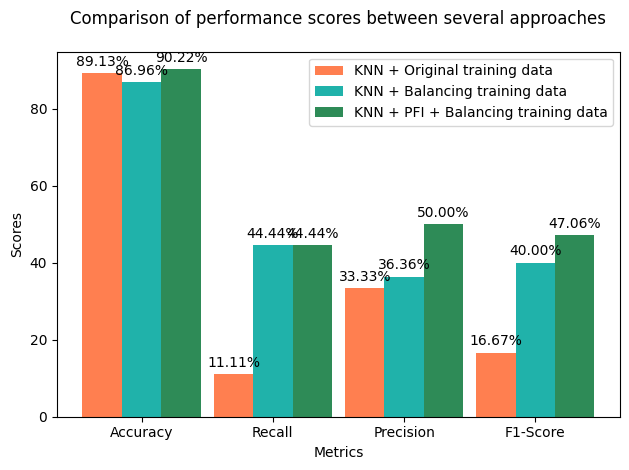

In [ ]:
# Data for the bar plot
categories = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
# Performance metrics for KNN with original data
original_performance = [accuracy_ori * 100, recall_ori * 100, precision_ori * 100, f1_score_ori * 100]
# Performance metrics for KNN with balanced data
main_performance = [accuracy_main * 100, recall_main * 100, precision_main * 100, f1_score_main * 100]
# Performance metrics for optimized KNN with PFI and balanced data
optimization_performance = [best_accuracy, best_recall, best_precision, best_f1_score]

x = np.arange(len(categories))  # the label locations
width = 0.3  # the width of the bars

# Create the bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, original_performance, width, label='KNN + Original training data', color='coral')
rects2 = ax.bar(x, main_performance, width, label='KNN + Balancing training data', color='lightseagreen')
rects3 = ax.bar(x + width, optimization_performance, width, label='KNN + PFI + Balancing training data', color='seagreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of performance scores between several approaches', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels for each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()

# Display the plot
plt.show()

🧁 Conclusion based on the above graph:


1.   The model trained with the original training data has a high accuracy score, but still has a bias because the prediction performance of the minority class (On-Time) is much lower than that of the majority class (Late), as indicated by the low recall score.

2.   The model trained with the training data that went through the balancing process has a lower accuracy score than the original model. However, the performance of the model in predicting the majority and minority classes has become more balanced. This is evident from the significant increase in the recall score, precision score, and F1 score.

3.   The implementation of PFI on the KNN model with training data that has gone through the balancing process has succeeded in optimizing the ability of the KNN method in predicting the graduation of students in the Undiksha PTI program.








